In [1]:
import ehrapy as ep
import matplotlib.pyplot as plt

In [2]:
adata_full = ep.io.read_h5ad("/home/thelichking/Desktop/anndatas/full_pic_dataset_1.h5ad")
adata_respiratory = ep.io.read_h5ad("/home/thelichking/Desktop/anndatas/respiratory_diseases_anndata_2.h5ad")
adata_pneumonia = ep.io.read_h5ad("/home/thelichking/Desktop/anndatas/adata_pneumonia_unspecified_3.h5ad")

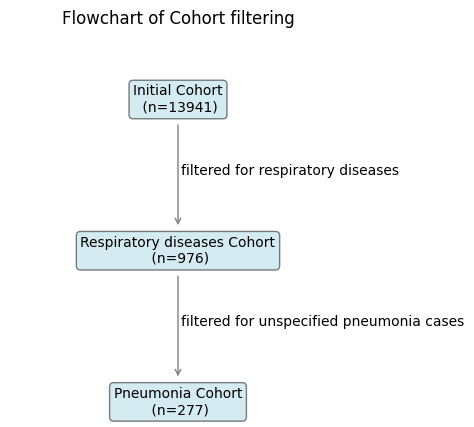

In [3]:
adata = adata_full

cohort_tracker = ep.tl.CohortTracker(adata, columns=["age_in_month", "gender", "FIRST_CAREUNIT"])

cohort_tracker(adata, label="Initial Cohort")

adata = adata_respiratory

cohort_tracker(adata, label="Respiratory diseases Cohort", operations_done="filtered for respiratory diseases")

adata = adata_pneumonia

cohort_tracker(

    adata,

    label="Pneumonia Cohort",

    operations_done="filtered for unspecified pneumonia cases",

)

flowchart = cohort_tracker.plot_flowchart(title="Flowchart of Cohort filtering", show=False)
flowchart[0].savefig("flowchart_cohort_tracker.png", dpi=600)

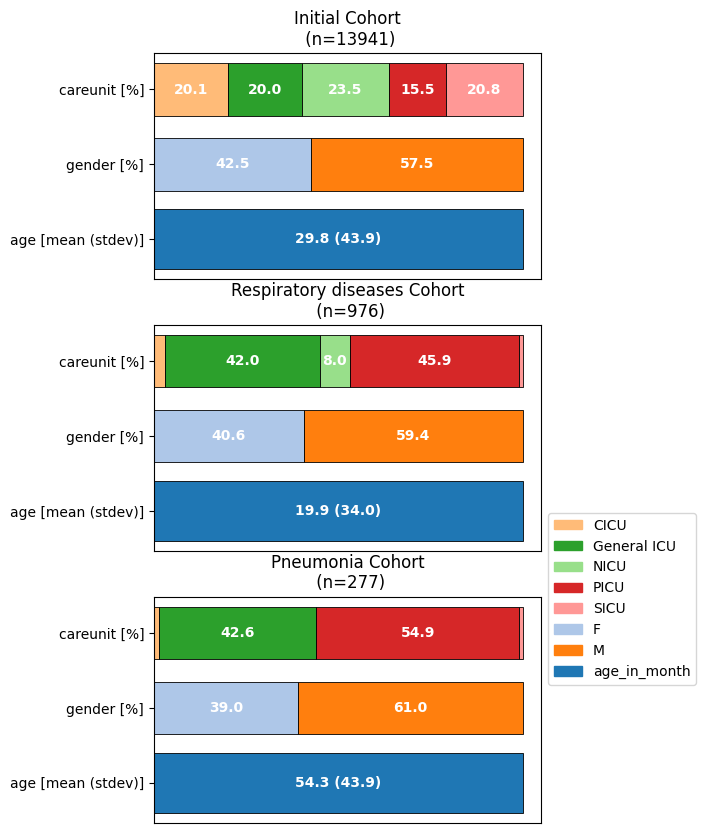

In [11]:
cohort_barplot = cohort_tracker.plot_cohort_barplot(

    subfigure_title=True,

    color_palette="tab20",

    yticks_labels={

        "age_in_month": "age [mean (stdev)]",
        "gender": "gender [%]",
        "FIRST_CAREUNIT": "careunit [%]",

    },

    legend_labels={

    },

    legend_kwargs={"bbox_to_anchor": (1, 1.4)},
    subplots_kwargs = {"figsize": (5,10)},
    show=False

)
cohort_barplot[0].savefig("barplot_cohort_tracker.png", dpi=600, bbox_inches='tight')